170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


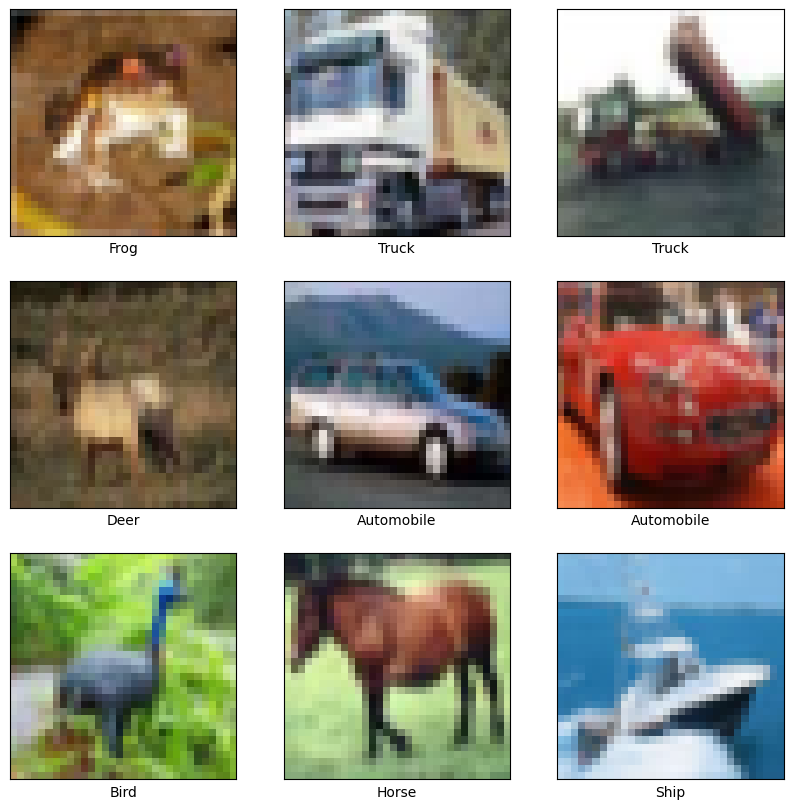

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 92ms/step - accuracy: 0.3227 - loss: 1.8240 - val_accuracy: 0.5055 - val_loss: 1.3669
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.5433 - loss: 1.2843 - val_accuracy: 0.5828 - val_loss: 1.1593
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6176 - loss: 1.0978 - val_accuracy: 0.6292 - val_loss: 1.0603
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.6545 - loss: 0.9837 - val_accuracy: 0.6549 - val_loss: 0.9813
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.6777 - loss: 0.9122 - val_accuracy: 0.6813 - val_loss: 0.8985
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7034 - loss: 0.8470 - val_accuracy: 0.6859 - val_loss: 0.9080
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.7189 - loss: 0.8013 - val_accuracy: 0.6939 - val_loss: 0.8854
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7368 - loss: 0.7552 - 

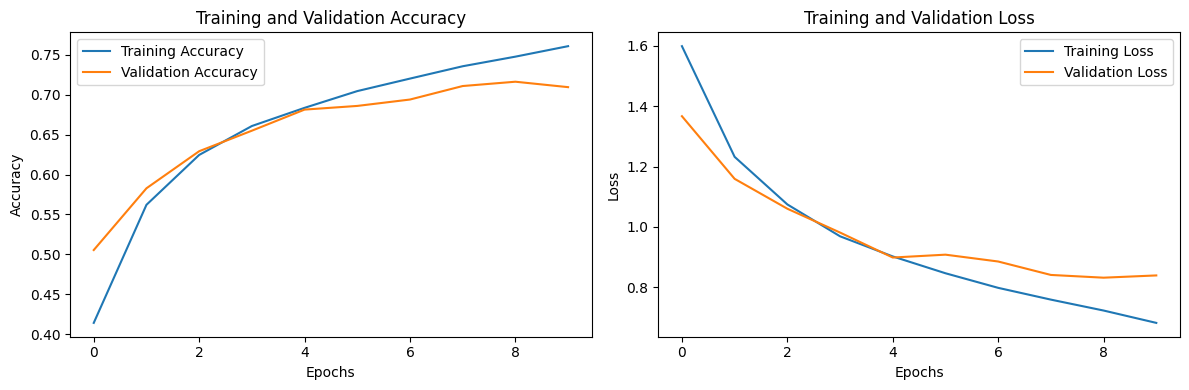

In [1]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoded format
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Display a few sample images from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def display_images(x, y, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        plt.xlabel(class_names[np.argmax(y[i])])
    plt.show()

# Show the first 9 images from the training set
display_images(x_train, y_train)

# Step 3: Build the Convolutional Neural Network (CNN)
cnn_model = models.Sequential([
    # Convolutional layers with max-pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and add fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Step 4: Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Step 5: Train the model
cnn_history = cnn_model.fit(x_train, y_train, epochs=10,
                            validation_data=(x_test, y_test), batch_size=64)

# Step 6: Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy}")

# Step 7: Plot training and validation accuracy and loss
def plot_metrics(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Display the accuracy and loss plots
plot_metrics(cnn_history)

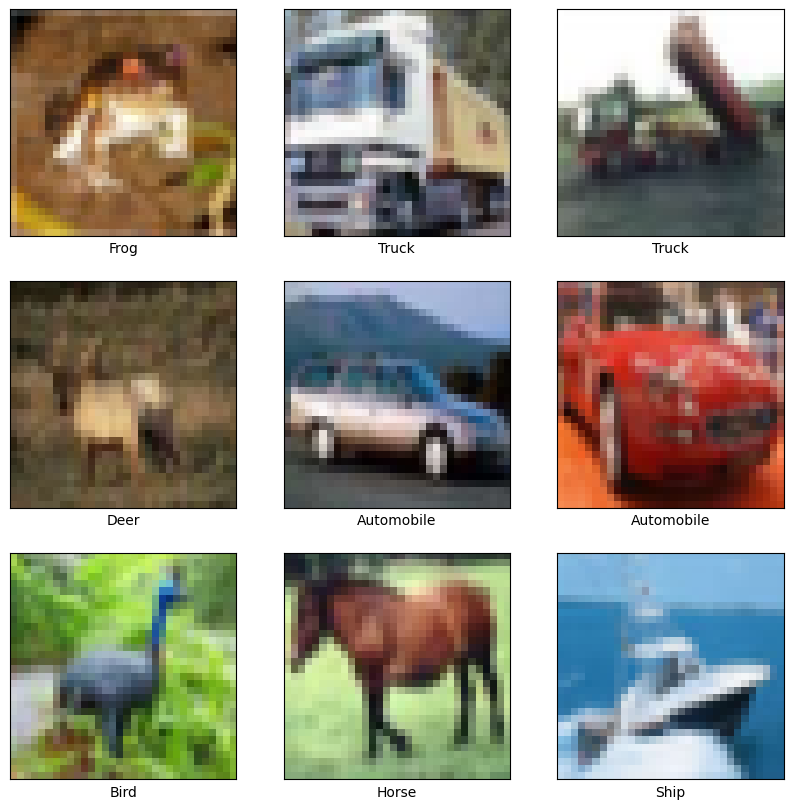

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.3246 - loss: 1.8213 - val_accuracy: 0.5119 - val_loss: 1.3287
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.5451 - loss: 1.2778 - val_accuracy: 0.5854 - val_loss: 1.1492
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6127 - loss: 1.0933 - val_accuracy: 0.6110 - val_loss: 1.1002
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.6485 - loss: 0.9881 - val_accuracy: 0.6505 - val_loss: 1.0077
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6847 - loss: 0.9017 - val_accuracy: 0.6687 - val_loss: 0.9339
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7065 - loss: 0.8403 - val_accuracy: 0.6840 - val_loss: 0.9039
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7207 - loss: 0.7927 - val_accuracy: 0.6990 - val_loss: 0.8860
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7359 - loss: 0.7530 - 

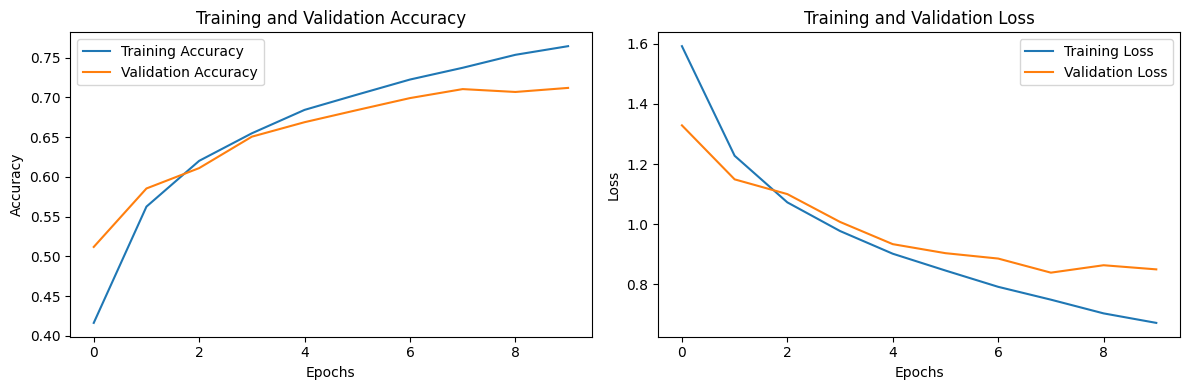

In [2]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoded format
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Display a few sample images from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def display_images(x, y, num_images=9):
    plt.figure(figsize=(10, 10), dpi=100)  # Set higher dpi for better resolution
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], interpolation='nearest')  # Use 'nearest' interpolation for clearer images
        plt.xlabel(class_names[np.argmax(y[i])])
    plt.show()

# Show the first 9 images from the training set
display_images(x_train, y_train)

# Step 3: Build the Convolutional Neural Network (CNN)
cnn_model = models.Sequential([
    # Convolutional layers with max-pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and add fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Step 4: Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Step 5: Train the model
cnn_history = cnn_model.fit(x_train, y_train, epochs=10,
                            validation_data=(x_test, y_test), batch_size=64)

# Step 6: Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy}")

# Step 7: Plot training and validation accuracy and loss
def plot_metrics(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Display the accuracy and loss plots
plot_metrics(cnn_history)


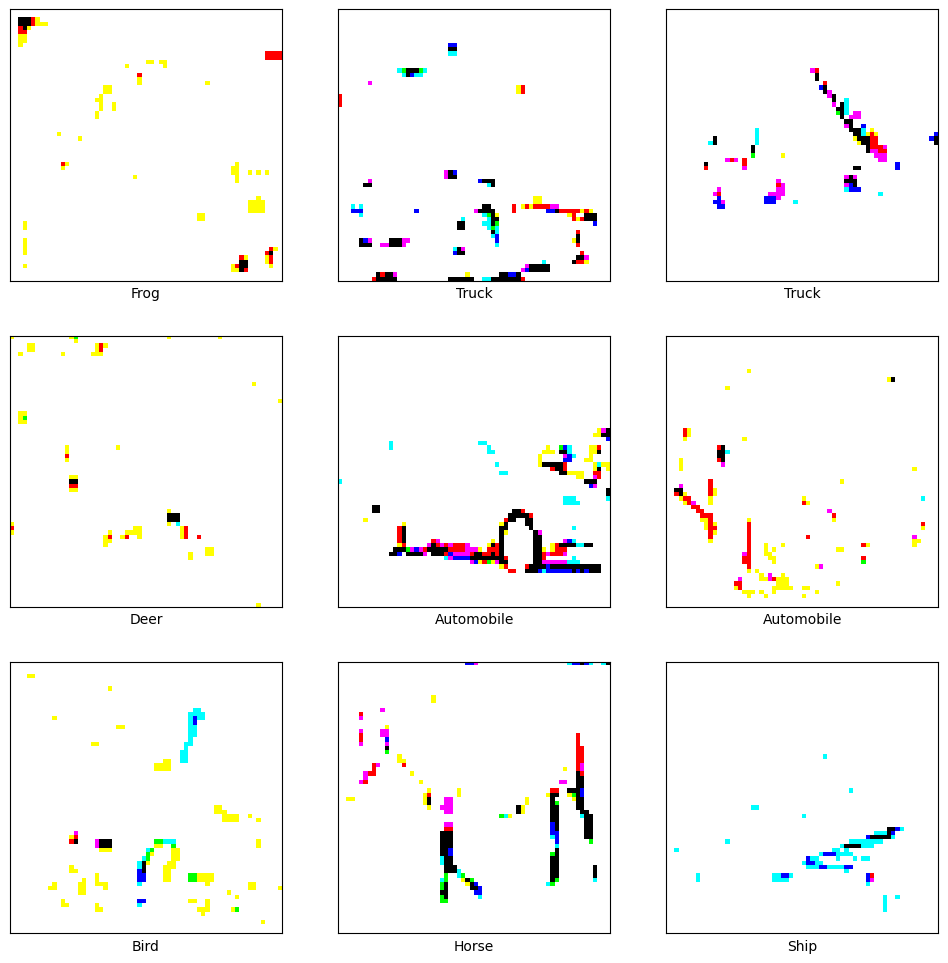

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.2155 - loss: 3.8657

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 9216, but received input with shape (None, 1024)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=False
  • mask=None

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import cv2

# Step 1: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoded format
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Resize images to a higher resolution (e.g., 64x64)
def resize_images(images, target_size=(64, 64)):
    resized_images = []
    for img in images:
        img = array_to_img(img)  # Convert array to image
        img = img.resize(target_size)  # Resize to target size
        resized_images.append(img_to_array(img))  # Convert back to array
    return np.array(resized_images)

# Resize training images to 64x64
x_train_resized = resize_images(x_train)

# Step 3: Sharpen image (Optional)
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening filter
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Step 4: Display a few sample images from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def display_images(x, y, num_images=9):
    plt.figure(figsize=(12, 12), dpi=100)  # Increase DPI for better clarity
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = x[i]
        img = sharpen_image(img)  # Sharpen the image (optional)
        plt.imshow(img)
        plt.xlabel(class_names[np.argmax(y[i])])
    plt.show()

# Show the first 9 images from the resized and sharpened training set
display_images(x_train_resized, y_train)

# Step 5: Build the Convolutional Neural Network (CNN)
cnn_model = models.Sequential([
    # Convolutional layers with max-pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and add fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Step 6: Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Step 7: Train the model
cnn_history = cnn_model.fit(x_train_resized, y_train, epochs=10,
                            validation_data=(x_test, y_test), batch_size=64)

# Step 8: Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy}")

# Step 9: Plot training and validation accuracy and loss
def plot_metrics(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Display the accuracy and loss plots
plot_metrics(cnn_history)


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

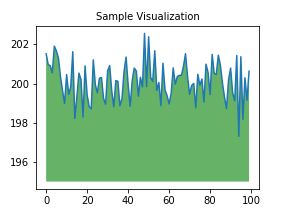

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)